/tmp/ipykernel_1037543/3366026538.py:28: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(collection)


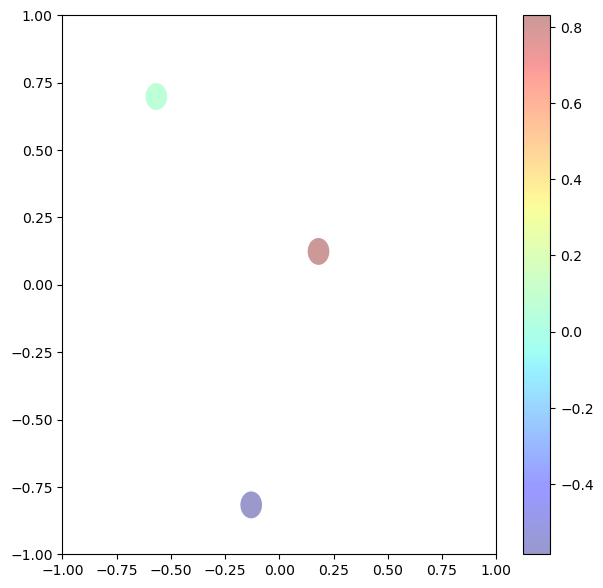

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

n_of_particles = 3
frames = 10

radius = 0.05
x = 0.5*np.random.randn(frames,n_of_particles)
y = 0.5*np.random.randn(frames,n_of_particles)
z = 0.5*np.random.randn(frames,n_of_particles)


patches = []
for p in range(n_of_particles):
    circle = plt.Circle((x[0,p], y[0,p]), radius)
    patches.append(circle)

collection = clt.PatchCollection(patches, cmap=plt.cm.jet, alpha=0.4)
collection.set_array(z[0,:])
# collection.set_clim([-1, 1])
fig.colorbar(collection)

ax.add_collection(collection)



In [15]:
z[0,:]

array([ 0.06354706,  0.83023692, -0.58425482])

In [ ]:
def animate(frame):
    patches = []
    for p in range(n_of_particles):
        circle = plt.Circle((x[frame,p], y[frame,p]), radius)
        patches.append(circle)

    collection.set_paths(patches)
    collection.set_array(z[frame,:])

anim = anm.FuncAnimation(fig, animate,
                               frames=10, interval=1000, blit=False)
plt.show()

In [2]:
from IPython import display

In [3]:
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()    

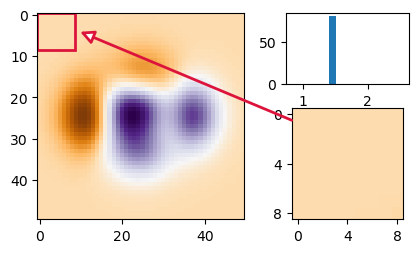

In [16]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch
import matplotlib.animation
plt.rcParams["figure.figsize"] = np.array([6,3.6])*0.7

x = np.linspace(-3,3)
X,Y = np.meshgrid(x,x)
f = lambda x,y: (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)+1.5
Z = f(X,Y)

bins=np.linspace(Z.min(), Z.max(), 16)
cols = plt.cm.PuOr((bins[:-1]-Z.min())/(Z.max()-Z.min()))

gs = gridspec.GridSpec(2, 2, height_ratios=[34,53], width_ratios=[102,53])
fig = plt.figure()
ax=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])

ax.imshow(Z, cmap="PuOr")
# rec = plt.Rectangle([-.5,-.5], width=9, height=9, edgecolor="crimson", fill=False, lw=2)
conp = ConnectionPatch(xyA=[-0.5,0.5], xyB=[9.5,4], coordsA="data", coordsB="data",
                      axesA=ax3, axesB=ax, arrowstyle="-|>", zorder=25, shrinkA=0, shrinkB=1,
                      mutation_scale=20, fc="w", ec="crimson", lw=2)
ax3.add_artist(conp)
# ax.add_artist(rec)
im = ax3.imshow(Z[:9,:9], cmap="PuOr", vmin=Z.min(), vmax=Z.max())
ticks = np.array([0,4,8])
ax3.set_yticks(ticks); ax3.set_xticks(ticks)
ax2.hist(Z[:9,:9].flatten(), bins=bins)

def ins(px,py):
    global rec, conp, histpatches
    ll = [px-.5,py-.5]
    rec.set_xy(ll)
    conp.remove()
    conp = ConnectionPatch(xyA=[-0.5,0.5], xyB=[px+9.5,py+4], coordsA="data", coordsB="data",
                      axesA=ax3, axesB=ax, arrowstyle="-|>", zorder=25, shrinkA=0, shrinkB=1,
                      mutation_scale=20, fc="w", ec="crimson", lw=2)
    ax3.add_patch(conp)
    data = Z[px:px+9,py:py+9]
    im.set_data(data)
    ax3.set_xticklabels(ticks+px)
    ax3.set_yticklabels(ticks+py)
    ax2.clear()
    ax2.set_ylim(0,60)
    h, b_, patches = ax2.hist(data.flatten(), bins=bins, ec="k", fc="#f1a142")
    [pat.set_color(cols[i]) for i, pat in enumerate(patches)]

def func(p):
    px,py = p
    ins(px, py)

phi = np.linspace(0.,2*np.pi)
r = np.sin(2*phi)*20+np.pi/2
xr = (r*np.cos(phi)).astype(np.int8)
yr = (r*np.sin(phi)).astype(np.int8)

plt.subplots_adjust(top=0.93,bottom=0.11,left=0.04,right=0.96,hspace=0.26,wspace=0.15)
frames = np.c_[xr+20, yr+20]
ani = matplotlib.animation.FuncAnimation(fig, func, frames=frames, interval=300, repeat=True)

plt.show()

In [17]:
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()    